In [ ]:
#Meu primeiro tratamento de dados sozinho.

In [139]:
import pandas as pd
import seaborn as sbr
import statistics as sts

In [141]:
#Vou começar com análise exploratória para entender o problema mas a fundo.

In [145]:
#Realizando a leitura do nosso documento csv tempo.
dataset = pd.read_csv('tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [147]:
#Primeira coisa que quero verificar ò tamanho dessa tabela

In [149]:
dataset.shape

(14, 5)

In [151]:
#Segunda coisa quero verificar a ocorrencia de cada coluna para saber se tem algo fora do padrão.

In [155]:
group = dataset.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

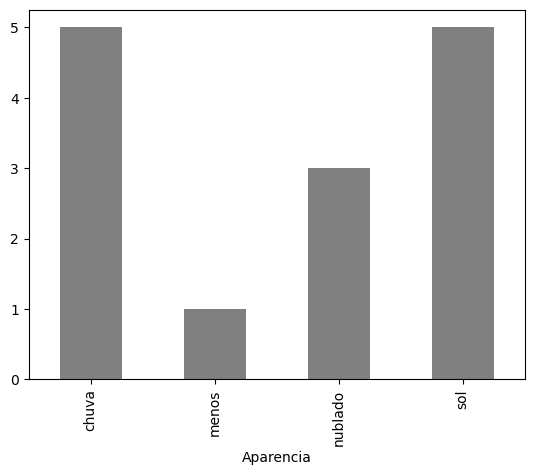

In [157]:
#Criei um grafico, so pra treino mesmo
group.plot.bar(color='gray')

In [159]:
#excluindo um dado inconsistente que nao consegue aplicar moda
dataset = dataset[dataset['Aparencia'] != 'menos']

In [161]:
#verificando novamente os valores de aparencia para saber se saiu+
group = dataset.groupby(['Aparencia']).size()
group

Aparencia
chuva      5
nublado    3
sol        5
dtype: int64

In [165]:
#Verificando coluna Temperatura
group = dataset.groupby(['Temperatura']).size()
group

Temperatura
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [167]:
#Modificando valor errado com mediana
mediana = sts.median(dataset['Temperatura'])
mediana

75

In [169]:
#substituir valor errado pela mediana:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130) , 'Temperatura'] = mediana

In [171]:
#atribuo novamente a variavel grou ja que vai receber um novo valor da mediana no valor que estava incorreto
group = dataset.groupby(['Temperatura']).size()
group

Temperatura
65    1
68    1
69    1
70    1
71    1
72    1
75    3
80    1
81    1
83    1
85    1
dtype: int64

In [173]:
#Verificando a coluna umidade

In [177]:
group = dataset.groupby(['Umidade']).size()
group

Umidade
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [179]:
mediana = sts.median(dataset['Umidade'])
mediana

86.0

In [181]:
#Resolvendo NAs
#dataset['Umidade'].fillna(mediana, inplace=True)
dataset.fillna({'Umidade': mediana}, inplace=True)

In [183]:
#Substituindo valores errados pela mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [185]:
group = dataset.groupby(['Umidade']).size()
group

Umidade
70.0    3
75.0    1
80.0    1
85.0    1
86.0    3
90.0    2
91.0    1
95.0    1
dtype: int64

In [187]:
#Verificando se tem NAs
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [189]:
dataset['Vento'].head

<bound method NDFrame.head of 0          FALSO
1     VERDADEIRO
2          FALSO
3          FALSO
4          FALSO
5     VERDADEIRO
7          FALSO
8          FALSO
9            NaN
10    VERDADEIRO
11    VERDADEIRO
12         FALSO
13    VERDADEIRO
Name: Vento, dtype: object>

In [191]:
group = dataset.groupby(['Vento']).size()
group

Vento
FALSO         7
VERDADEIRO    5
dtype: int64

In [193]:
dataset['Vento'].isnull().sum()

1

In [195]:
dataset['Vento'].fillna('Falso', inplace=True)

In [197]:
dataset['Vento'].isnull().sum()

0

In [199]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [201]:
dataset.head

<bound method NDFrame.head of    Aparencia  Temperatura  Umidade       Vento Jogar
0        sol           85     85.0       FALSO   nao
1        sol           80     90.0  VERDADEIRO   nao
2    nublado           83     86.0       FALSO   sim
3      chuva           70     86.0       FALSO   sim
4      chuva           68     80.0       FALSO   sim
5      chuva           65     70.0  VERDADEIRO   nao
7        sol           75     95.0       FALSO   nao
8        sol           69     70.0       FALSO   sim
9      chuva           75     86.0       Falso   sim
10       sol           75     70.0  VERDADEIRO   sim
11   nublado           72     90.0  VERDADEIRO   sim
12   nublado           81     75.0       FALSO   sim
13     chuva           71     91.0  VERDADEIRO   nao>

In [203]:
dataset['Jogar'].describe()

count      13
unique      2
top       sim
freq        8
Name: Jogar, dtype: object

In [205]:
dataset['Jogar'].head

<bound method NDFrame.head of 0     nao
1     nao
2     sim
3     sim
4     sim
5     nao
7     nao
8     sim
9     sim
10    sim
11    sim
12    sim
13    nao
Name: Jogar, dtype: object>

In [207]:
dataset.shape

(13, 5)